<a href="https://colab.research.google.com/github/thatvernon-yes/CCMACLRL_EXERCISES_COM222/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


## B. Load and understand the dataset

In [150]:
# put your answer here
dataset = pd.read_excel("dataset.xlsx")
dataset

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Aldrin Galvez,1,1,1,1453,1
1,Aleix Arcega,0,1,1,770,0
2,Allen Siaton,1,1,1,1289,1
3,Andrew Fat,0,0,0,284,0
4,Angelo Basilio,1,1,1,1886,1
5,Rv Arta,0,0,0,202,0
6,Beatriz Asuncion,0,1,0,752,0
7,Brix Manzanero,1,1,1,1521,1
8,Carl Hipolito,0,0,0,451,0
9,Celestine Villanueva,0,1,0,896,0


1. Display the summary of all the features of the dataset using `.info()`

In [152]:
# put your answer here
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       50 non-null     int64
 1   Active in social media?      50 non-null     int64
 2   Replies to comments?         50 non-null     int64
 3   Number of friends/followers  50 non-null     int64
 4   Personality                  50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


2. Display the total number of samples from each label using `.value_counts()`

In [153]:
# put your answer here
dataset.value_counts()

Post/Share Frequently?  Active in social media?  Replies to comments?  Number of friends/followers  Personality
0                       0                        0                     95                           0              1
1                       1                        1                     1234                         1              1
                                                 0                     762                          1              1
                                                                       1200                         1              1
                                                 1                     285                          1              1
                                                                       324                          1              1
                                                                       443                          1              1
                                                                       655                          1              1
                                                                       753                          1              1
                                                                       818                          1              1
                                                                       954                          1              1
                                                                       1200                         1              1
                                                                       1235                         1              1
0                       0                        0                     179                          0              1
1                       1                        1                     1289                         1              1
                                                                       1432                         1              1
                                                                       1453                         1              1
                                                                       1521                         1              1
                                                                       1642                         1              1
                                                                       1700                         1              1
                                                                       1886                         1              1
                                                                       2800                         1              1
                                                                       3031                         1              1
                                                                       3239                         1              1
                        0                        1                     650                          1              1
0                       1                        1                     1100                         0              1
                                                                       984                          1              1
                                                                       770                          0              1
                        0                        0                     200                          0              1
                                                                       202                          0              1
                                                                       211                          0              1
                                                                       250                          0              1
                                                                       284                          0              1
                           

In [154]:
dataset['Personality'].value_counts()

,count
Personality,
1,25
0,25


## C. Split the dataset into training and test set

In [155]:
dataset

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,1,1,1,1453,1
1,0,1,1,770,0
2,1,1,1,1289,1
3,0,0,0,284,0
4,1,1,1,1886,1
5,0,0,0,202,0
6,0,1,0,752,0
7,1,1,1,1521,1
8,0,0,0,451,0
9,0,1,0,896,0


3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [156]:
# put your answer here
X = dataset.drop(columns=['Personality']).values
X

array([[   1,    1,    1, 1453],
       [   0,    1,    1,  770],
       [   1,    1,    1, 1289],
       [   0,    0,    0,  284],
       [   1,    1,    1, 1886],
       [   0,    0,    0,  202],
       [   0,    1,    0,  752],
       [   1,    1,    1, 1521],
       [   0,    0,    0,  451],
       [   0,    1,    0,  896],
       [   1,    1,    0, 1200],
       [   1,    1,    1,  818],
       [   0,    0,    0,  211],
       [   0,    0,    1,  526],
       [   1,    1,    1,  753],
       [   1,    1,    1,  285],
       [   0,    1,    1, 1100],
       [   1,    1,    1, 1200],
       [   0,    0,    0,  780],
       [   1,    1,    1,  443],
       [   1,    1,    1, 3239],
       [   1,    0,    1,  650],
       [   1,    1,    1, 1432],
       [   1,    1,    0,  762],
       [   0,    0,    0,  200],
       [   0,    0,    0, 1600],
       [   0,    0,    0,  398],
       [   1,    1,    1, 3031],
       [   1,    1,    1,  954],
       [   0,    0,    0,  343],
       [  

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [157]:
# put your answer here
Y = dataset['Personality'].values
Y

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0])

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [158]:
# put your answer here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(30, 4)
(20, 4)
(30,)
(20,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

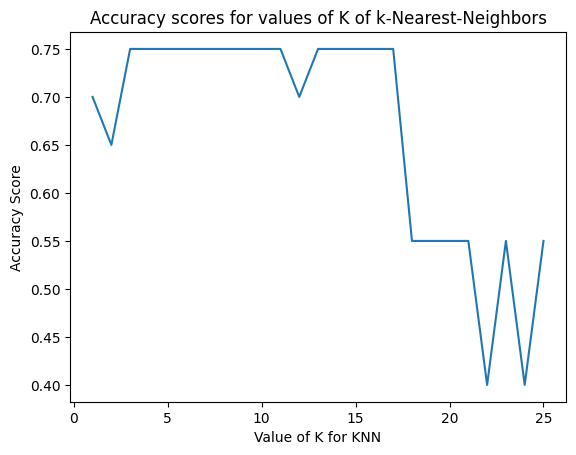

In [159]:
# put your answer here

k_range = list(range(1,26))
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)

  #Train the model
  knn.fit(X_train, Y_train)

  #Test the model
  Y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(Y_test, Y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy scores for values of K of k-Nearest-Neighbors')
plt.show()

7. Train the model using the `.fit()`

In [179]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model
knn.fit(X_train, Y_train)

#Test the model
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)


0.75

8. Test the model using the `.predict()`

In [180]:
# put your answer here
knn.predict([[0, 1, 0, 1000]])

array([0])

## Evaluate the model

9. Create a confusion matrix

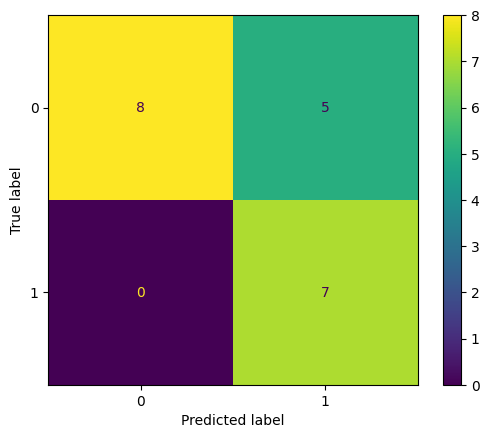

In [182]:
# put your answer here

conf_matrix = confusion_matrix(Y_pred, Y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [183]:
# put your answer here
metrics.accuracy_score(Y_test, Y_pred)

0.75

11. Display the precision

In [184]:
# put your answer here
precision = precision_score(Y_test, Y_pred, average = None)
print("Precision:", precision)

Precision: [0.61538462 1.        ]


12. Display the recall

In [185]:
# put your answer here

recall = recall_score(Y_test, Y_pred, average = None)
print("Recall:", recall)

Recall: [1.         0.58333333]


13. Display the f1-score

In [186]:
# put your answer here

f1 = f1_score(Y_test, Y_pred, average = None)
print("f1-score:", f1)

f1-score: [0.76190476 0.73684211]


In [187]:
#test
print(knn.predict([[0,1,0,1000]]))

[0]
